# Predict student failures using linear regression with HW/clusters/Exam1 data as features

## Start with within S16

### upload data into a dataframe

In [2]:
import pandas as pd
from io import StringIO

In [3]:
df = pd.read_csv('S16_all.csv')

In [4]:
import numpy as np

### What are column names?

In [5]:
df.columns.values

array(['Total Points', 'EX1', 'MaxCl1', 'TryObtCl1', 'PassCl1',
       'FirstTryTimeCl1', 'TotTimeCL1', 'MaxCl2', 'TryObtCl2', 'PassCl2',
       'FirstTryTimeCl2', 'TotTimeCL2', 'MaxCl3', 'TryObtCl3', 'PassCl3',
       'FirstTryTimeCl3', 'TotTimeCL3', 'MaxCl4', 'TryObtCl4', 'PassCl4',
       'FirstTryTimeCl4', 'TotTimeCL4', 'MaxCl5', 'TryObtCl5', 'PassCl5',
       'FirstTryTimeCl5', 'TotTimeCL5', 'MaxCl6', 'TryObtCl6', 'PassCl6',
       'FirstTryTimeCl6', 'TotTimeCL6', 'p1', 'c1', 'h1', 'p2', 'c2', 'p3',
       'c3', 'h3', 'p4', 'c4', 'p5', 'c5', 'h5', 'p6', 'c6'], dtype=object)

In [6]:
df.columns.values[32:]

array(['p1', 'c1', 'h1', 'p2', 'c2', 'p3', 'c3', 'h3', 'p4', 'c4', 'p5',
       'c5', 'h5', 'p6', 'c6'], dtype=object)

### For the features that refer to homework data, if the value is missing, mark it zero

In [7]:
for a in df.columns.values[32:]:
    df[a] = df[a].fillna(0)
    

### For cluster performance, fill with the mean value of the non-empty entries in the feature

In [8]:
for b in df.columns.values[2:32]:
    df[b] = df[b].fillna(np.mean(df[b].dropna()))

### Split df into features/total points

In [9]:
y=df['Total Points']

In [10]:
X=df[df.columns.values[1:]]

### Split into training/test set

#### Simple 70/30, in the future I'd use 60/20/20 or a fancy K-fold stratified thing I'm learning about to have development, but here
#### I do have other semesters I could test on

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Use standard scaler to standarize data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Perform linear regression using all features

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
slr = LinearRegression()
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions based on fitted regressor

#### I opened the box on the test set too early 

In [17]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

 #### get r^2

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [19]:
r2_score(y_train, y_train_pred)

0.67973904217371439

In [20]:
r2_score(y_test, y_test_pred)

0.72843363101585301

#### How many in test/prediction were concern worthy students?

In [21]:
sum(i<744 for i in y_test)

23

In [22]:
sum(i<744 for i in y_test_pred)

26

#### Similar numbers, but this isn't the best evaluation of the model, we need to see these predictions in context

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

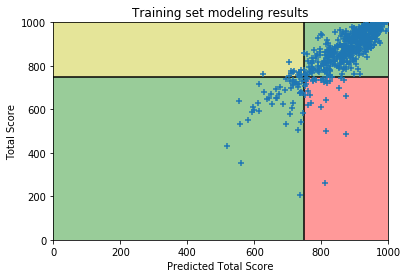

In [44]:

plt.xlim([0,1000])
plt.ylim([0,1000])
plt.xlabel('Predicted Total Score')
plt.ylabel('Total Score')
plt.title('Training set modeling results')
plt.hlines(y=750,xmin=0,xmax=1000)
plt.vlines(x=750,ymin=0,ymax=1000)
r1=plt.Rectangle((0,0),750,750,fc='g',alpha=0.4)
plt.gca().add_patch(r1)
r2=plt.Rectangle((750,750),250,250,fc='g',alpha=0.4)
plt.gca().add_patch(r2)
r1=plt.Rectangle((0,750),750,250,fc='y',alpha=0.4)
plt.gca().add_patch(r1)
r1=plt.Rectangle((750,0),250,750,fc='r',alpha=0.4)
plt.gca().add_patch(r1)
plt.scatter(y_train_pred,y_train,marker='+',zorder=100)

### Green regions are correctly predicted students.
### Yellow region is students who were warned but ended up ok - this is an incorrect data prediction, but a good result
### Red region - students we didn't warn, but ended up below a C-

#### take a peek at the coef, particularly the first, which is exam 1

In [65]:
slr.coef_

array([  3.18874926e+02,   3.52732728e+02,  -1.43129016e+01,
        -4.57004586e+01,  -3.87849351e-02,   1.96155475e-02,
         5.56459011e+01,   1.56514642e+00,  -9.48974182e+00,
         3.02904426e-02,  -5.92151242e-03,  -2.99485581e+02,
        -9.62325955e+00,   5.79603168e+01,  -3.68475126e-02,
         2.71776286e-02,   3.01305669e+02,   3.13336417e-01,
        -6.76753261e+01,   1.74152207e-02,  -1.70084581e-02,
        -2.85822277e+01,   5.87322750e+00,   1.41146548e+01,
         2.43609917e-02,  -1.94059439e-02,  -1.94618461e+01,
        -6.26441025e+00,   2.53124818e+01,   5.32847375e-03,
        -2.33688809e-03,  -1.11246032e+00,   3.81757618e+01,
         3.33875941e+01,  -9.96070497e+01,   8.29824966e+01,
         2.04228528e+02,  -9.73454889e+01,   5.95382399e+01,
        -2.41463987e+01,  -4.25854519e+01,  -1.39711245e+01,
         2.81285910e+01,   1.10262086e+02,   2.72438005e+01,
        -1.33733402e+01])

#### Make a bit for whether our prediction predicted a concern worthy student

In [45]:
y_test_pred_bit=[i<750 for i in y_test_pred]
y_test_bit=[j<750 for j in y_test]


#### How many decisions would have been wrong for the test set

In [46]:
np.sum([a!=b for a,b in zip(y_test_pred_bit,y_test_bit)])/len(y_test_bit)


0.074688796680497924

#### and for the training set?

In [47]:
y_train_pred_bit=[i<750 for i in y_train_pred]
y_train_bit=[j<750 for j in y_train]

In [48]:
np.sum([a!=b for a,b in zip(y_train_pred_bit,y_train_bit)])/len(y_train_bit)


0.080357142857142863

#### how many students in the training set should've been preducted as a failure?

In [96]:
np.sum(y_train_bit)

80

#### How many of the failures did I decide correctly?

In [97]:
n=0
m=0
for a, b in zip (y_train_pred_bit,y_train_bit):
   if b:
    m=m+1
    if a==b:
        n=n+1
    
   

In [100]:
n

49

#### 49/80 isn't that great

In [101]:
n=0
m=0
for a, b in zip (y_test_pred_bit,y_test_bit):
   if b:
    m=m+1
    if a==b:
        n=n+1

In [102]:
m

23

In [103]:
n

17

#### 17/23 for test set. Lets look at EX1 and make a simple prediction. Of the lowest 80 on EX1, how many were failures?

In [49]:
df_play=df

In [50]:
sum([j<750 for j in df_play.sort_values('EX1').head(80)['Total Points']])



50

##### 50 out of 80 if we simply use EX1, so our simple model works just as well as our regressor

### We've probably got too many features (~50 for 800 samples). Let's look at those features a bit and see if there's some redundancy

#### Let's look at correlations between fetures, using the seaborn library

In [156]:
import seaborn as sns; sns.set(color_codes=True)

In [173]:
sns.set_style('ticks')


#### Get correlation matrix

In [175]:
corr=df.corr()

#### get a mask to hide upper triangle

In [176]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#### seaborn heatmap

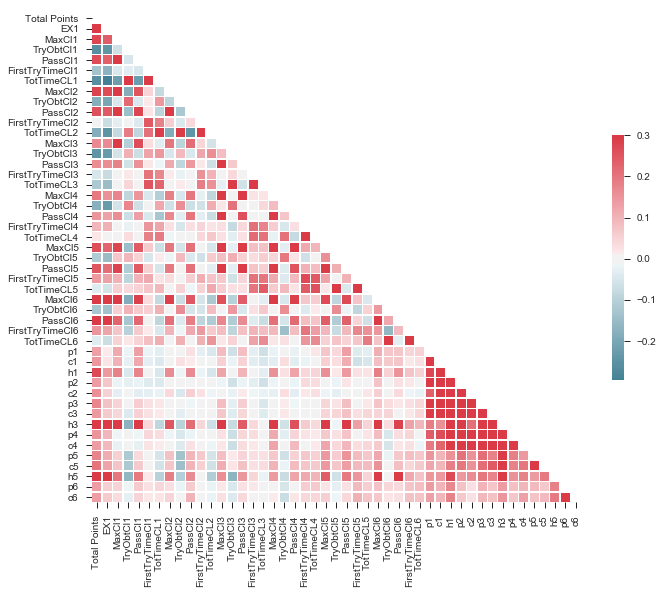

In [178]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Cluster information (bottom right) seems to be pretty highly correlated with itself. Students who do the homework will tend to do all of it. Also, alot of those are mostly 1's

#### Also try obtained doesn't seem to be correlated with total points ever

### Use another seaborn correlation plot

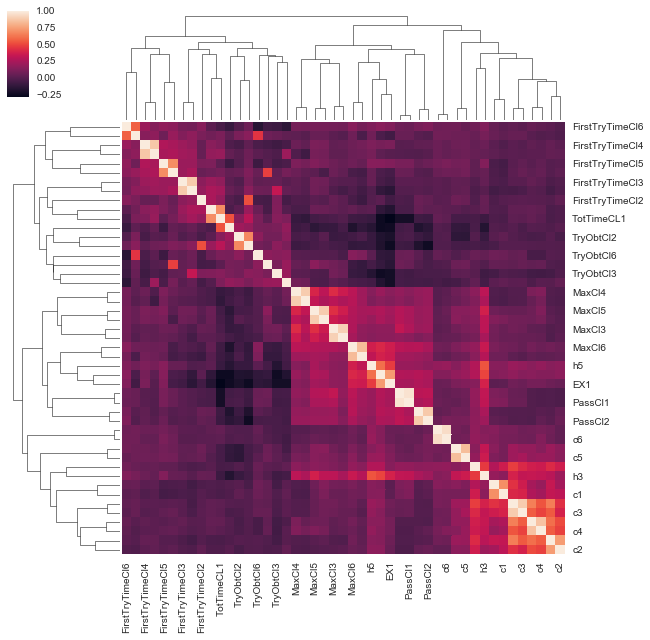

In [52]:
sns.set()


# Draw the full plot
sns.clustermap(df.corr())

#### Lot's of 2x2 squares, but the labels are too bunched to tell what's what

#### Let's look at the last bunch of features, which should include alot of the cluster stuff, and see what that tells me

C:\Users\Schroeder\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(-0.001, 0.001)

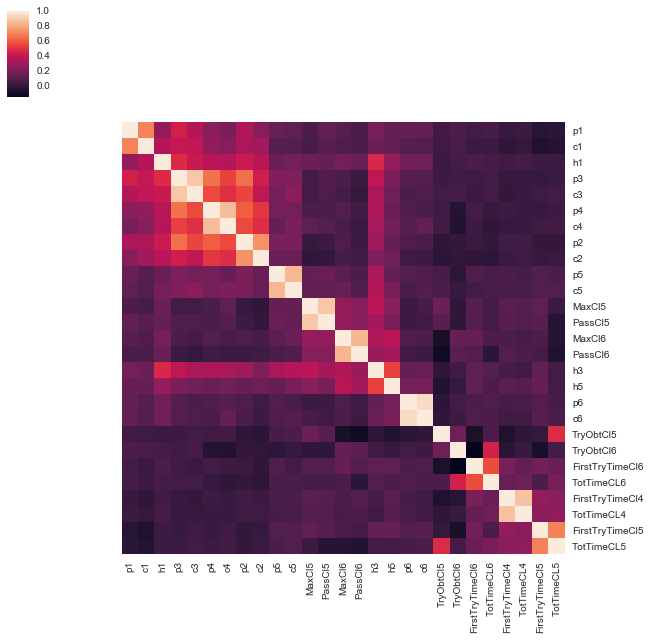

In [187]:
cg = sns.clustermap(df.iloc[:,20:].corr())
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
cg.ax_row_dendrogram.set_xlim([0,0])

#### Squares make sense. p6 and c6 - people who watch prelecture videos will tend to do well on the prelecture quizzes
#### FirstTryTime does a good job predicting TotTime
#### MaxScore for a cluster predicts whether or not you passed it

## Next steps for regressor: Remove redundant features through correlation analysis, and feature importance as well. If we can cut down significantly on the number of features, explore polynomial features as well. 

## Now for something completely different

### Rip some random forest regressor code, shove this in it, see what happens

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred_RF = forest.predict(X_train)
y_test_pred_RF = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_RF),
        mean_squared_error(y_test, y_test_pred_RF)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_RF),
        r2_score(y_test, y_test_pred_RF)))

MSE train: 661.168, test: 3340.046
R^2 train: 0.948, test: 0.629


#### Does an exceptional job fitting the training set, but poor performance on the test set. Overfit, this needs fewer features.
#### Let's throw in a residuals plot, to get a different look at the results of our model

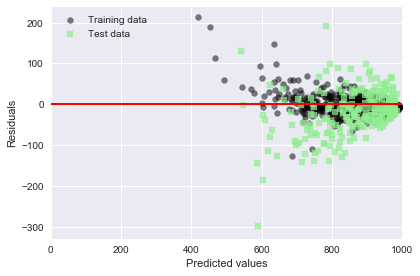

In [55]:

plt.scatter(y_train_pred_RF,  
            y_train_pred_RF - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred_RF,  
            y_test_pred_RF - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=1000, lw=2, color='red')
plt.xlim([0, 1000])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

##### Pretty good results for high score students, but things get worse as you move down

In [191]:
import dill
dill.dump_session('notebook_env.db')